

<div style="background-color:#cbfefb; padding:30px; border-radius: 10px; 
  border: 2px solid black; 
  padding: 20px;">
    <h1 style="color:#2d7ff9;text-align:center;" >INTENSITY ANALYSIS USING NLP AND PYTHON</h1>
</div>


 

<div> <h1 style="color:#2d7ff9;"padding:50px; > Introduction </h1>
</div>

## <p> <b style="color:#77dafe;">The objective of this project is to develop an intelligent system using NLP to predict the intensity in the text reviews. By analyzing various parameters and process data, the system will predict the intensity where its happiness, angriness or sadness. This predictive capability will enable to proactively optimize their processes, and improve overall customer satisfaction.</b> </p>


# <b style="color:#2d7ff9;" >Table of Content </b>

##  **[1. Import Necessary Libraries](#toc_1)**

##  [**2.Data Collection**](#toc_2)

##  [**3.Data Overview**](#toc_3)

##  [**4.Exploratory Data Analysis**](#toc_4)

##  [**5.Feature Engineering**](#toc_5)


   ###   5.1  **[ Label Encoding](#toc_5.1)** 
   
   ###    5.2  **[Text PreProcessing](#toc_5.2)**
  
   ###    5.3 **[Lemmitization](#toc_5.3)** 
   
   ###     5.4 **[Vectorization](#toc_5.4)**                                            

   
##  [**6.Split Train the Dataset**](#toc_6)



##  [7.Model Selection](#toc_7)



###     7.1 **[Random Forest](#toc_7.1)** 
   
###     7.2 **[XGBoost](#toc_7.2)**
   
###     7.3 **[Decision Tree](#toc_7.3)**
   
###     7.4 **[Support Vector Machine](#toc_7.4)**
   


##  [**8.Conclusion**](#toc_8)


## <a id ='toc_1'></a> [1.Importing Necessary Liberaries](#toc_1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from transformers import AutoTokenizer
!pip install scikit-plot
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import requests
from transformers import AutoTokenizer

import warnings

# Filter out warnings from a specific module (e.g., FutureWarning from numpy)
warnings.filterwarnings("ignore", category=FutureWarning, module="numpy")


import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re
import string

from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.tokenize import word_tokenize as nltk_word_tokenize

from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
import numpy as np
from nltk.corpus import stopwords

from scipy.spatial.distance import cosine


from nltk.corpus import stopwords

# Download the stopwords list if you haven't already
import nltk
nltk.download('stopwords')

# Get the English stopwords list

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## <a id='toc_2'></a>[2. DATA COLLECTION](#toc_2)
 * ### The data is stored in three seperate csv files so reading them individually.

In [2]:

df_train1 =pd.read_csv(r"C:\Users\akaur\Downloads\Intensity_data\happiness.csv")

In [3]:
df_train2 =pd.read_csv(r"C:\Users\akaur\Downloads\Intensity_data\sadness.csv")
                       

In [4]:
df_train3 =pd.read_csv(r"C:\Users\akaur\Downloads\Intensity_data\angriness.csv")

* ### Combining the three files into one using concat and converting it into dataframe(df)

In [5]:
df= pd.concat([df_train1,df_train2,df_train3])

df.reset_index(inplace=True,drop=True)

## <a id='toc_3_'></a>[3. DATA OVERVIEW](#toc_3)

In [6]:
df.columns


Index(['content', 'intensity'], dtype='object')

In [7]:
df.head()

,content,intensity
0,Wants to know how the hell I can remember word...,happiness
1,Love is a long sweet dream & marriage is an al...,happiness
2,The world could be amazing when you are slight...,happiness
3,My secret talent is getting tired without doin...,happiness
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   object
dtypes: object(2)
memory usage: 32.0+ KB


### We can observe their are total 2039 entries in the dataset with two columns.

In [9]:
df.describe()

,content,intensity
count,2039,2039
unique,1586,3
top,"['You Hurt Me But I Still Love You.', 'True Lo...",happiness
freq,134,708


 ### The Dataset has 1586 unique values in content column and three unique intensity in intensity column.

In [10]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (2039, 2)


,content,intensity
719,I don’t get tired of loving you. I just get ti...,sadness
325,"To be useful is to be happy, and all else, inc...",happiness
156,"Smile and forgive, it's the only way to live.",happiness
522,"Love is a bird, let it fly.",happiness
1952,A person who has lots of anger inside definite...,angriness


## <a id='toc1_4_'></a>[4.	DATA PREPROCESSING ](#toc_4)

### <a id='toc1_4_1'></a>[Find and handle the null values which are present in the dataset.](#toc0_)
* ### We can check the null values by method called as `isnull()` which will give output of null values in the column.<br>

In [11]:
# Check the count of null values among the dataset
df.isnull().sum()

content      0
intensity    0
dtype: int64

### <a id='toc1_4_2'></a>[Find the duplicate values from the dataset and handle them if any presents.](#toc0_)
* ### Here we can check we the duplicated values by using the `duplicated()` method from pandas dataframe.<br>

In [12]:
print(df.duplicated().sum()) #calculalting the total duplicate values

447


* ### Here we can see the Numbers of the duplicate rows which are present in the dataset.

### <a id='toc1_4_3_'></a>[Dropping the Duplicated values.](#toc0_)
* Here for dropping the Duplicate values by using the `drop_duplicated()` method.<br>


In [13]:
## df.drop_duplicates(inplace=True) #dropping the duplicated values

### <a id='toc1_4_4_'></a>[Count the numbers of  Unique values in each column in given dataset.](#toc0_)
#### Get the number of unique values for each column
* Here we are checking the null values for each columns. <br>
* Here we are using `nunique()` method to get the numbers od unique values in columns <br>



In [14]:
# printing unique values for each column
for i in df.columns:
    print(i,df[i].nunique())

content 1586
intensity 3


### <a id='toc1_4_4_'></a>[Perform Intensity wise  distribution using the count plot.](#toc0_)
#### Get count for unique values in "Intensity" column variable.
* Here we are using `value_counts()` method. <br>


In [15]:
df['intensity'].value_counts()

intensity
happiness    708
angriness    696
sadness      635
Name: count, dtype: int64

### <a id='toc1_4_5_'></a>[Countplot](#toc0_)
* One way to think of a count plot is as a histogram that is plotted over a categorical variable rather than a quantitative one.<br>
* Bars are used to show how many observations fit into each group of classification. 
<br>
 


<Axes: xlabel='intensity', ylabel='count'>

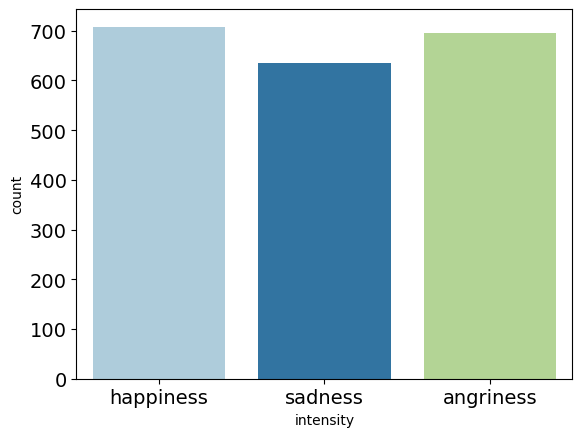

In [16]:
plt.tick_params(axis='both', which='major', labelsize=14) #it will increase the fontsize of the label
sns.countplot(x=df["intensity"],palette='Paired') #here we are defining the values of x axis and color palette

 We can observe from above histogram than the data is almost uniformlydistributed across all intensity with ## Happines having upperedge.

## <a id='toc_4'></a>[4. FEATURE ENGINEERING](#toc_5)
Extracting relevant features and identify key process variables that impact intensity.

## Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['intensity'] = label_encoder.fit_transform(df['intensity'])

print(df['intensity'].unique())


[1 2 0]


 ## Encoded value 
* Anger 0,Happines 1, Sadness 2 

   ## Text Processing:
Converting raw text data into numerical features using techniques like tokenization, stemming, lemmatization, and vectorization (e.g., TF-IDF or word embeddings) for natural language processing tasks.

In [18]:
# creating a function to remove puncuation and not relevant text.
def clean_text(text):
  text = re.sub(r'[^A-Za-z0-9\s.\(\)[\]{\}]+' , '' , text)
  # print(text)
  text = text.lower()
  # print(text)
  text = " ".join(text.split())
  return text
# creating a function to count the tokens in  clean_text.
def count_tokens(text):
  tokens = tokenizer.encode(text , add_special_tokens = True)
  return(len(tokens))


This line of code is utilizing the AutoTokenizer class 
from the Hugging Face transformers library to load a pre-trained tokenizer for the BERT model.






In [19]:
# "AutoTokenizer: This is a class provided by the transformers library
#  which automatically selects the appropriate tokenizer based on the provided model name or path".

# "From_pretrained("bert-base-uncased"): This method initializes the tokenizer with
#  the pre-trained weights and configuration for the specified model". 

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [20]:
df["content_token"] = df['content'].apply(count_tokens)


Token indices sequence length is longer than the specified maximum sequence length for this model (3184 > 512). Running this sequence through the model will result in indexing errors


 ## Creating the content_token coulumn in the data frame to count number of tokens in the original text.

In [21]:
df['content_cleaned'] = df['content'].apply(clean_text)

## Creating the cleaned_token_ coulumn in the data frame to store the cleaned text in the Data frame. 

In [22]:
df["cleaned_token"] = df['content_cleaned'].apply(count_tokens)

## Cleaned Dataframe

In [23]:
# checking the newly updated dataframe.

df.head()


,content,intensity,content_token,content_cleaned,cleaned_token
0,Wants to know how the hell I can remember word...,1,33,wants to know how the hell i can remember word...,29
1,Love is a long sweet dream & marriage is an al...,1,16,love is a long sweet dream marriage is an alar...,15
2,The world could be amazing when you are slight...,1,13,the world could be amazing when you are slight...,13
3,My secret talent is getting tired without doin...,1,13,my secret talent is getting tired without doin...,12
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",1,21,khatarnaak whatsapp status ever cant talk wife...,17


## LEMMATIZATION 
### Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma.

In [24]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
lm = WordNetLemmatizer()

##Clean_text function removesthe stopword and punctuations from the text and convert them into their raw form.

def clean_text(text):
    corpus = []
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [lm.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(x) for x in text))
    return ' '.join(str(x) for x in text)
df['corpus'] = df['content_cleaned'].apply(lambda x:clean_text(x))

In [26]:
##Checking The Transformed Data

In [27]:
print(df['content'].iloc[1])

print(df['content_cleaned'].iloc[1])

print(df['corpus'].iloc[1])

Love is a long sweet dream & marriage is an alarm clock..
love is a long sweet dream marriage is an alarm clock..
love long sweet dream marriage alarm clock


We can observe the differences in the length of the content at index 1, it reduces gradually as we treat the data ( 'is','a','the','and' has been removed.)

## Creating the new dataframe
* From above DataFrame we need only two columns 'corpus' and 'intensity' to proceed futher.

In [28]:
new_df = pd.concat([df['corpus'], df['intensity']], axis=1)

In [29]:
new_df.head()


,corpus,intensity
0,want know hell remember word song year ago can...,1
1,love long sweet dream marriage alarm clock,1
2,world could amazing slightly strange,1
3,secret talent getting tired without anything,1
4,khatarnaak whatsapp status ever cant talk wife...,1



## VECTORIZATION

### Vectorization refers to the process of converting non-vectorized data or operations into vectorized form, enabling efficient execution of mathematical operations on entire arrays or datasets at once, rather than on individual elements.



## Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer



# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into BoW vectors
bow_vectors = vectorizer.fit_transform(new_df['corpus'])

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert BoW vectors to array and print
print("BoW Vectors:")
print(bow_vectors.toarray())

# Print the vocabulary (feature names)
print("\nVocabulary:")
print(feature_names)


BoW Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vocabulary:
['00' '100' '11' ... 'youwhen' 'youxa0xa0angry' 'yuh']


## TFIDF





In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:



tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data in the DataFrame into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['corpus'])




# Convert TF-IDF matrix to DataFrame for easier inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate TF-IDF DataFrame with the original DataFrame
df_with_tfidf = pd.concat([ tfidf_df], axis=1)

# Print DataFrame with TF-IDF vectors
print(df_with_tfidf)









       00  100   11   12  123whatsappstatuscom   13  2000  204  247   30  ...  \
0     0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
1     0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
2     0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
3     0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
4     0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
...   ...  ...  ...  ...                   ...  ...   ...  ...  ...  ...  ...   
2034  0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
2035  0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
2036  0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
2037  0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   
2038  0.0  0.0  0.0  0.0                   0.0  0.0   0.0  0.0  0.0  0.0  ...   

      youis  youll  young  

## Embedding

In [33]:
import pandas as pd
import numpy as np
import gensim.downloader as api

# Load pre-trained GloVe word embeddings
glove_model = api.load("glove-wiki-gigaword-100")




# Tokenize the text data in the DataFrame
new_df['tokens'] = new_df['corpus'].apply(lambda x: x.split())

# Map each token to its corresponding word embedding vector
def get_word_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in glove_model.key_to_index:
            vectors.append(glove_model[token])
    return vectors

new_df['word_vectors'] = new_df['tokens'].apply(get_word_vectors)

# Aggregate word embedding vectors for each document
new_df['document_vector'] = new_df['word_vectors'].apply(lambda x: np.mean(x, axis=0) if x else np.nan)

print(new_df[ ['document_vector']])
new_df.head()

                                        document_vector
0     [0.13008529, 0.36875767, 0.4237169, -0.4005676...
1     [0.2911637, 0.15220559, 0.21431856, -0.1742885...
2     [0.0994722, 0.40464002, 0.608676, -0.1883094, ...
3     [0.2966245, 0.135434, 0.5600667, -0.35112166, ...
4     [0.15065102, 0.085228145, 0.211904, -0.0833972...
...                                                 ...
2034  [0.1688825, 0.21471699, 0.3592535, -0.02176499...
2035  [0.1013054, 0.22764201, 0.653934, -0.47121644,...
2036  [0.14400749, 0.25716165, 0.29010034, -0.52577,...
2037  [-0.062272992, 0.210577, 0.600775, -0.18734168...
2038  [0.1708484, -0.087108, 0.70379, -0.036042392, ...

[2039 rows x 1 columns]


,corpus,intensity,tokens,word_vectors,document_vector
0,want know hell remember word song year ago can...,1,"[want, know, hell, remember, word, song, year,...","[[-0.17124, 0.56447, 0.34667, -0.56711, -0.656...","[0.13008529, 0.36875767, 0.4237169, -0.4005676..."
1,love long sweet dream marriage alarm clock,1,"[love, long, sweet, dream, marriage, alarm, cl...","[[0.25975, 0.55833, 0.57986, -0.21361, 0.13084...","[0.2911637, 0.15220559, 0.21431856, -0.1742885..."
2,world could amazing slightly strange,1,"[world, could, amazing, slightly, strange]","[[0.49177, 1.1164, 1.1424, 0.14381, -0.10696, ...","[0.0994722, 0.40464002, 0.608676, -0.1883094, ..."
3,secret talent getting tired without anything,1,"[secret, talent, getting, tired, without, anyt...","[[0.69149, -0.31051, 0.49737, -0.14275, 0.0838...","[0.2966245, 0.135434, 0.5600667, -0.35112166, ..."
4,khatarnaak whatsapp status ever cant talk wife...,1,"[khatarnaak, whatsapp, status, ever, cant, tal...","[[-0.0070938, -0.047403, -0.23478, -0.15492, 0...","[0.15065102, 0.085228145, 0.211904, -0.0833972..."


In [34]:
new_df.head()

,corpus,intensity,tokens,word_vectors,document_vector
0,want know hell remember word song year ago can...,1,"[want, know, hell, remember, word, song, year,...","[[-0.17124, 0.56447, 0.34667, -0.56711, -0.656...","[0.13008529, 0.36875767, 0.4237169, -0.4005676..."
1,love long sweet dream marriage alarm clock,1,"[love, long, sweet, dream, marriage, alarm, cl...","[[0.25975, 0.55833, 0.57986, -0.21361, 0.13084...","[0.2911637, 0.15220559, 0.21431856, -0.1742885..."
2,world could amazing slightly strange,1,"[world, could, amazing, slightly, strange]","[[0.49177, 1.1164, 1.1424, 0.14381, -0.10696, ...","[0.0994722, 0.40464002, 0.608676, -0.1883094, ..."
3,secret talent getting tired without anything,1,"[secret, talent, getting, tired, without, anyt...","[[0.69149, -0.31051, 0.49737, -0.14275, 0.0838...","[0.2966245, 0.135434, 0.5600667, -0.35112166, ..."
4,khatarnaak whatsapp status ever cant talk wife...,1,"[khatarnaak, whatsapp, status, ever, cant, tal...","[[-0.0070938, -0.047403, -0.23478, -0.15492, 0...","[0.15065102, 0.085228145, 0.211904, -0.0833972..."


  ## <a id='toc_4'></a>[6. TRAIN TEST SPLIT](#toc_6)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_with_tfidf, df['intensity'], test_size=0.2, random_state=42)









In [39]:
y = df['intensity']

## <a id='toc_5'></a>[7. MODEL SELECTION](#toc_7)

 ## <a id='toc_5'></a>[7.1 RANDOM FOREST ](#toc_7.1)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['intensity'], test_size=0.2, random_state=42)

In [42]:

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [43]:


# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [44]:
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = rf_classifier.predict(X_test_tfidf)
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       129
           1       0.77      0.77      0.77       156
           2       0.80      0.71      0.75       123

    accuracy                           0.78       408
   macro avg       0.78      0.78      0.78       408
weighted avg       0.78      0.78      0.78       408



In [46]:
from sklearn.metrics import confusion_matrix, roc_curve, auc,roc_auc_score

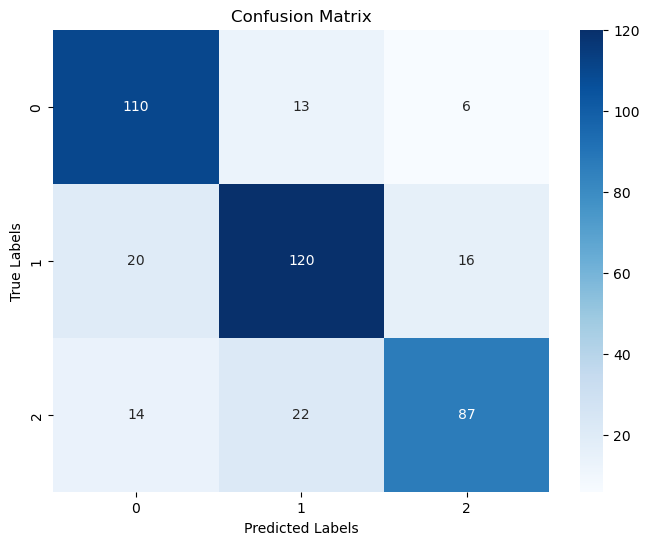

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


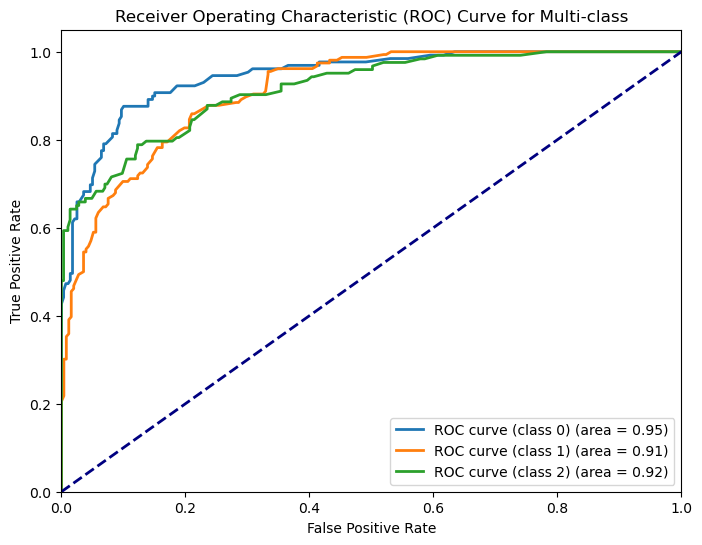

In [48]:
# Plotting ROC Curve
y_probs = rf_classifier.predict_proba(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [49]:

# Example DataFrame with text data and labels



# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion':['entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train RandomForestClassifier with best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = best_rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       129
           1       0.78      0.76      0.77       156
           2       0.81      0.71      0.76       123

    accuracy                           0.77       408
   macro avg       0.78      0.77      0.77       408
weighted avg       0.78      0.77      0.77       408



In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)



Accuracy: 0.7745098039215687


In [132]:
Accuracy_1 =77.45

### Conclusion
Accuracy with Hyperparameter Tunning --> 0.7745098039215687

Accuracy Without Hyperparameter Tuning -->  0.78  

We can observe their is not much difference between the two.

#   <a id='toc_5'></a>[7.2 XGBoost](#toc_7.2)

In [51]:
# import xgboost
import xgboost as xgb
# create an XG Boost classifier
xg_reg = xgb.XGBClassifier( n_estimators = 10)

In [52]:
# Fit and predict from the model
xg_reg.fit(X_train_tfidf,y_train)

preds = xg_reg.predict(X_test_tfidf)

In [53]:
from sklearn.metrics import accuracy_score


In [54]:
# Generate classification report
report = classification_report(y_test, preds)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       129
           1       0.69      0.79      0.73       156
           2       0.79      0.56      0.66       123

    accuracy                           0.72       408
   macro avg       0.73      0.71      0.71       408
weighted avg       0.72      0.72      0.71       408



In [55]:
# print the accuracy
print("Accuracy:",accuracy_score(y_test, preds))


Accuracy: 0.7156862745098039


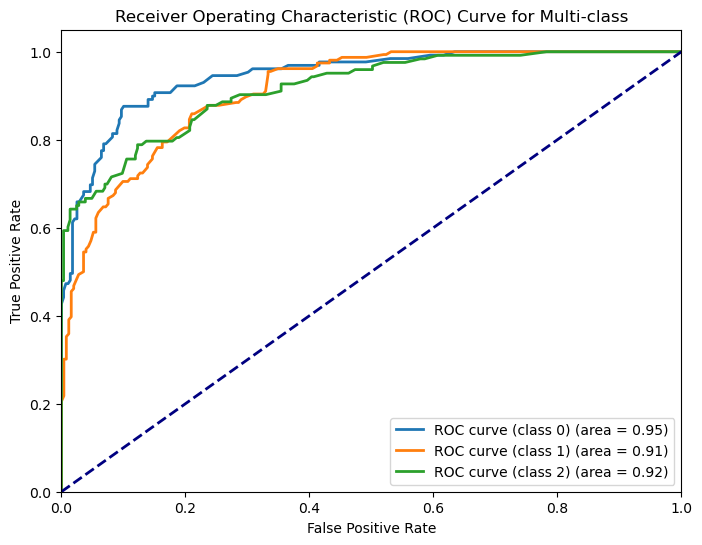

In [56]:
## Roc curve
# Plotting ROC Curve
preds = xg_reg.predict(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [57]:
# create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=xg_reg.classes_)

In [58]:
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))

precision 0.8424657534246576
recall 0.8541666666666666


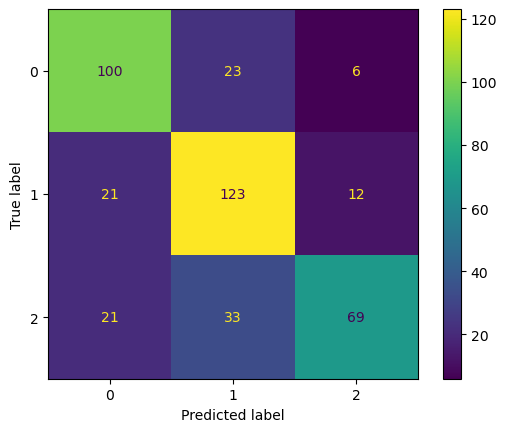

In [59]:
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=xg_reg.classes_)
disp.plot()

In [60]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

In [61]:
xgb_model = xgb.XGBClassifier()

In [62]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='accuracy')


In [63]:

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_tfidf, y_train)

# Evaluate final model
accuracy = best_xgb_model.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.7401960784313726


In [64]:
print("Accuracy:", accuracy)

Accuracy: 0.7401960784313726


In [135]:
Accuracy_2 = 74.01

## Evauation
### Accuracy with Hyperparameter Tunning --> 0.7401960784313726
### Accuracy Without Hyperparameter Tuning -->  0.7156862745098039
### We can observe that hypertuned model had performed much better.





# <a id='toc_5'></a>[7.3 Decision Tree](#toc_7.3)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtmodel_ini = DecisionTreeClassifier()
dtmodel_ini.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [67]:
y_pred_ini = dtmodel_ini.predict(X_test_tfidf)

In [68]:
conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0




In [69]:
from sklearn.metrics import classification_report

In [70]:
accuracy_score(y_test,y_pred_ini)

0.7230392156862745

In [71]:

# Generate a classification report
report = classification_report(y_test, y_pred_ini)

print(report)

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       129
           1       0.75      0.65      0.69       156
           2       0.72      0.67      0.69       123

    accuracy                           0.72       408
   macro avg       0.72      0.73      0.72       408
weighted avg       0.73      0.72      0.72       408



precision 0.8424657534246576
recall 0.8541666666666666


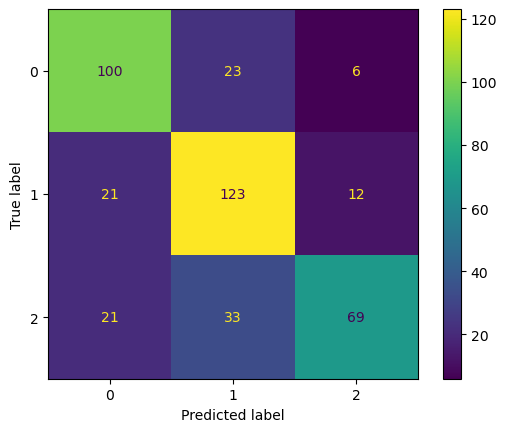

In [72]:
# create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=dtmodel_ini.classes_)
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=dtmodel_ini.classes_)
disp.plot()

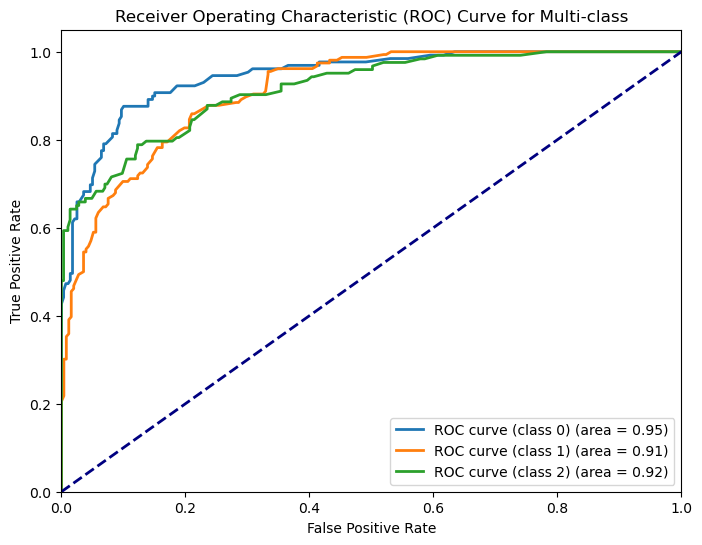

In [73]:
## Roc curve
# Plotting ROC Curve
preds = dtmodel_ini.predict(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [74]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator = dtmodel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_tfidf, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [75]:
best_parameters

{'max_depth': 10, 'min_samples_split': 20}

In [76]:
#Applying the Decision Tree on the training dataset
from sklearn.tree import DecisionTreeClassifier
dtmodel_tuned_pruned = DecisionTreeClassifier(max_depth=20,min_samples_split=100)
dtmodel_tuned_pruned.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=100)

In [77]:
#Running the model on the test dataset
y_pred_tuned_pruned = dtmodel_tuned_pruned.predict(X_test_tfidf)

In [78]:
accuracy_score(y_test,y_pred_tuned_pruned)

0.6985294117647058

In [79]:

y_pred = dtmodel_tuned_pruned.predict(X_train_tfidf)

In [80]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_train,y_pred)

0.724095646842428

In [138]:
Accuracy_3=72.40


## Evauation
### Accuracy with Hyperparameter Tunning --> 0.6985294117647058

### Accuracy Without Hyperparameter Tuning -->  0.7230392156862745

### We can observe that  Non - Hypertuned model had performed much better.

# <a id='toc_5'></a>[7.4 Support Vector Machine](#toc_7.4)

#  What is Support Vector Machine

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification.

The goal of the SVM algorithm is to create the decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

We can use various kernels which we can use in the various scenarios.

<a id="model"></a>
# Creating the model on training dataset

In [85]:
#  Applying the SVM on the training dataset
from sklearn.svm import SVC
SVMModel_ini = SVC()
SVMModel_ini.fit(X_train_tfidf,y_train)

SVC()

In [86]:
#Running the model on the test dataset
y_pred_ini = SVMModel_ini.predict(X_test_tfidf)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, log_loss

In [88]:
accuracy_score(y_test,y_pred_ini)

0.7867647058823529

precision 0.8551724137931035
recall 0.8671328671328671


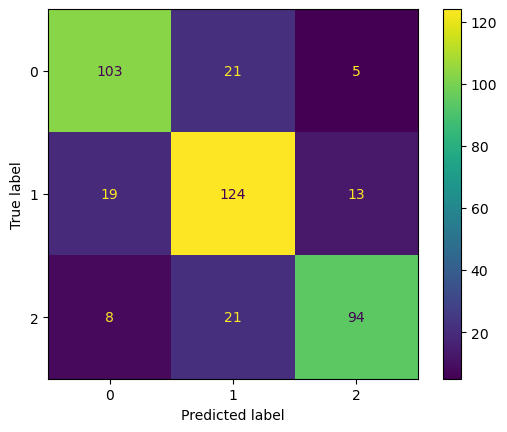

In [117]:
# create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=SVMModel_ini.classes_)
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=SVMModel_ini.classes_)

disp.plot()

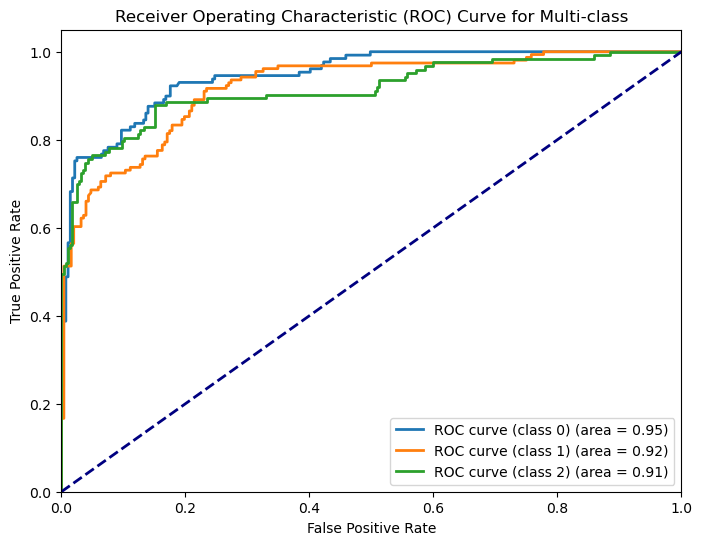

In [99]:
## Roc curve
# Plotting ROC Curve
preds =  SVMModel_ini.predict(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [101]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)","Nuetral(2)"]
# Classification Report
print(classification_report(y_test,SVMModel_ini.predict(X_test_tfidf),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.79      0.80      0.80       129
 Positive(1)       0.75      0.79      0.77       156
  Nuetral(2)       0.84      0.76      0.80       123

    accuracy                           0.79       408
   macro avg       0.79      0.79      0.79       408
weighted avg       0.79      0.79      0.79       408



In [107]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'kernel': ['rbf','poly','sigmoid']}]
grid_search = GridSearchCV(estimator = SVMModel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_tfidf, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [108]:
best_parameters

{'kernel': 'rbf'}

In [109]:
#Applying the SVM on the training dataset
from sklearn.svm import SVC
SVMModel_tuned = SVC(kernel='rbf',gamma=1, C=1)
SVMModel_tuned.fit(X_train_tfidf,y_train)

SVC(C=1, gamma=1)

In [110]:
#Running the model on the test dataset
y_pred_tuned = SVMModel_tuned.predict(X_test_tfidf)

In [111]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.7867647058823529

In [130]:
Accuracy_4 =78.67 

## Evaluation,

### Accuracy with Hyperparameter Tunning --> 0.7867647058823529


### Accuracy Without Hyperparameter Tuning -->  0.7867647058823529

### We can observe that  Both models have same accuracy.

## Checking accuracy on the Training dataset

In [124]:
#Running the model on the train dataset
y_pred_train = SVMModel_tuned.predict(X_train_tfidf)

In [125]:
#Using accuracy score we are checking the accuracy on the train dataset
accuracy_score(y_train,y_pred_train)

0.9846719803801349

## Highlight
#### There is lot of difference between Training and Testing dataset Accuracies.
#### This may be due to the overfittng thus we need to perform Cross-Validation.

## CROSS -VALIDATION

In [114]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

In [115]:
svm_model = SVC(kernel='linear')

In [116]:
# Initialize cross-validation iterator (example using 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, df_with_tfidf, y,
                            cv=kf)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Compute and print mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.79166667 0.77696078 0.79166667 0.75980392 0.74938575]
Mean Accuracy: 0.7738967577202871


### Mean -Accuracy of the model comes out to be 77.3%


## CONCLUSION

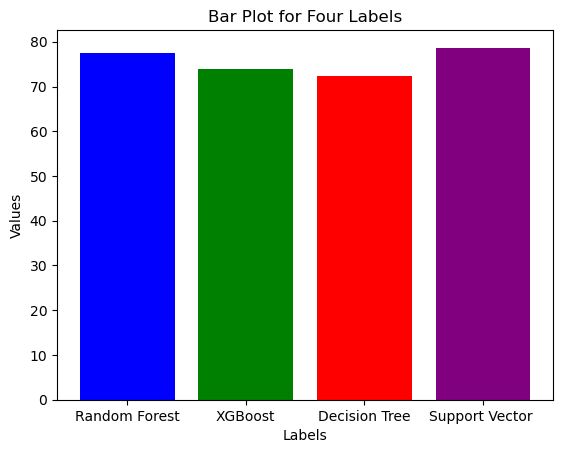

In [136]:

# Data
labels = ['Random Forest', 'XGBoost', 'Decision Tree', 'Support Vector ']
values = [Accuracy_1, Accuracy_2, Accuracy_3, Accuracy_4]

# Create bar plot
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Bar Plot for Four Labels')
plt.xlabel('Labels')
plt.ylabel('Values')

# Display the plot
plt.show()

## SUMMARY
### * We can conclude that Support Vector Machine Model is Good for our Problem Statement.
### * Higher Accuracy of 80 % or above can not be acheived by all the models 
### * There is Overfitting in our models as Data Size is too less.